# Steps 
- Import necessary dependencies
- Read and load datasets
- Exploratory data analysis
- Data visualization of target variables
- Data preprocessing
- Splitting our data into train and test sets
- Transforming datasets using TF-IDF vectorizer 
- Function for model evaluation
- Model building
- Model evaluation

In [2]:
import pandas as pd
import numpy as np 
# plots
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# for model building
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
columns = ['Id','Entity', 'Sentiment', 'Tweet Content']

url for data used : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [4]:
data = pd.read_csv('twitter-entity-sentiment-analysis/twitter_training.csv', names=columns)

In [5]:
data.head()

,Id,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.isna().sum()

Id                 0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.sample(5)

,Id,Entity,Sentiment,Tweet Content
31705,7443,LeagueOfLegends,Neutral,"I played Solo Q, my ADC chose Xayah and I went..."
73368,8968,Nvidia,Neutral,NVIDIA Research: Warp Drive Gaming – Eliminate...
21758,4124,CS-GO,Positive,ЭТО ВЕЛИКОБРИТАНИЕ!!!
67464,7154,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc-based b...
42698,10125,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"""pretty.honey.special."""


In [10]:
data['Sentiment'].value_counts()

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

## EDA

In [97]:
df = data.head(500)

Text(0.5, 0, 'Type of sentiment')

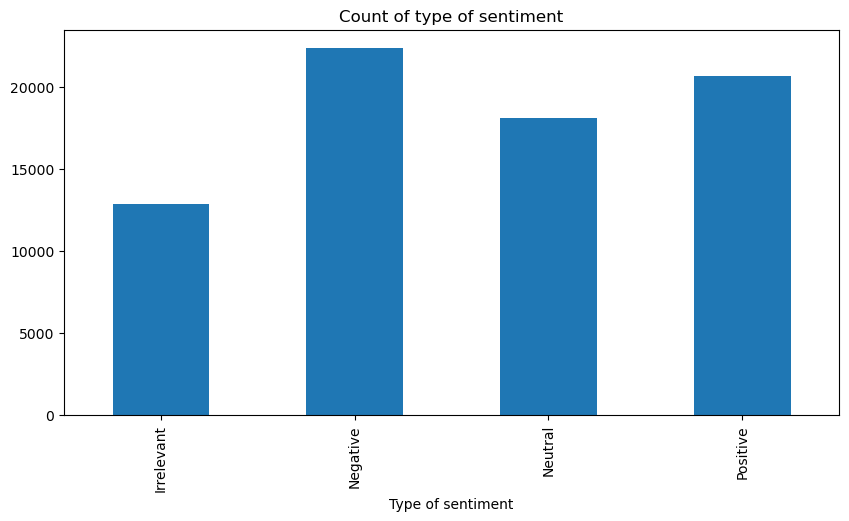

In [98]:
ax = data['Sentiment'].value_counts().sort_index().plot(kind='bar', title='Count of type of sentiment', figsize=(10,5))
ax.set_xlabel('Type of sentiment')

In [99]:
data['Tweet Content'].shape
#print(ex)

(73996,)

In [100]:
data.shape

(73996, 4)

In [101]:
ex = data['Tweet Content'][1]
print(ex)
type(ex)

I am coming to the borders and I will kill you all,


str

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\imhat\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [46]:
from nltk.corpus import stopwords

In [47]:
from nltk.tokenize import word_tokenize

In [48]:
word_tokenize(ex)

['I',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'I',
 'will',
 'kill',
 'you',
 'all',
 ',']

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()
le.fit(data['Sentiment'])
le.classes_
data['Sentiment'] = le.transform(data['Sentiment'])

In [104]:
data.head()

,Id,Entity,Sentiment,Tweet Content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [105]:
le.inverse_transform([0,1,2,3])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [106]:
data1 = data.copy()

### stop word removal

In [54]:
from nltk.corpus import stopwords

In [55]:
stopwords_list = stopwords.words('english')

In [56]:
from nltk.stem.porter import PorterStemmer

In [57]:
port_stem = PorterStemmer()

In [58]:
import re

In [59]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)  # removing punctuation
    stemmed_content = stemmed_content.lower()          # lower casing
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]  # removing stopwords from the data
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [60]:
data['Tweet Content'] = data['Tweet Content'].apply(stemming)

In [64]:
data['Tweet Content'][9]

'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg'

## Extracting features and Output

In [65]:
X = data['Tweet Content'].values
y = data['Sentiment']

In [66]:
X , y

(array(['im get borderland murder', 'come border kill',
        'im get borderland kill', ...,
        'realiz window partit mac year behind nvidia driver idea notic',
        'realiz window partit mac like year behind nvidia driver car fuck idea ever notic',
        'like window partit mac like year behind driver idea notic'],
       dtype=object),
 0        3
 1        3
 2        3
 3        3
 4        3
         ..
 74677    3
 74678    3
 74679    3
 74680    3
 74681    3
 Name: Sentiment, Length: 73996, dtype: int32)

In [67]:
vec = TfidfVectorizer()
vec.fit(X)

X = vec.transform(X)

In [68]:
print(X)

  (0, 12545)	0.672460959876397
  (0, 9088)	0.5050982589083702
  (0, 7341)	0.32489583024771473
  (0, 2122)	0.4325675736546788
  (1, 10336)	0.4966318265888706
  (1, 3458)	0.4449782891293641
  (1, 2120)	0.7452188611559063
  (2, 10336)	0.5345301888165152
  (2, 9088)	0.5767662231645913
  (2, 7341)	0.3709950244906562
  (2, 2122)	0.49394422039680846
  (3, 12545)	0.6499836346024973
  (3, 9088)	0.48821511098131337
  (3, 3458)	0.4054038888193035
  (3, 2122)	0.41810879814782276
  (4, 12545)	0.672460959876397
  (4, 9088)	0.5050982589083702
  (4, 7341)	0.32489583024771473
  (4, 2122)	0.4325675736546788
  (5, 12545)	0.672460959876397
  (5, 9088)	0.5050982589083702
  (5, 7341)	0.32489583024771473
  (5, 2122)	0.4325675736546788
  (6, 21164)	0.28974429718140715
  (6, 20930)	0.2597210581739125
  :	:
  (73993, 5128)	0.3152398629018161
  (73993, 1578)	0.3086042735564626
  (73994, 21910)	0.1859995270886587
  (73994, 21313)	0.27179262917007785
  (73994, 15566)	0.2817935714704552
  (73994, 13997)	0.424004081

### Splitting into Training and test data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, stratify=y, random_state=42)

In [70]:
X.shape, X_train.shape, X_test.shape

((73996, 22361), (59196, 22361), (14800, 22361))

### Machine Leanring Model

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7235135135135136

In [82]:
metrics.confusion_matrix(y_test,y_pred)

array([[1131,  710,  169,  565],
       [  14, 3986,  156,  316],
       [  32,  791, 2254,  545],
       [  17,  642,  135, 3337]], dtype=int64)

In [84]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      2575
           1       0.65      0.89      0.75      4472
           2       0.83      0.62      0.71      3622
           3       0.70      0.81      0.75      4131

    accuracy                           0.72     14800
   macro avg       0.78      0.69      0.70     14800
weighted avg       0.76      0.72      0.72     14800



## Sentimental Analysis using pre-trained model (RoBERTa)

In [85]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [86]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer_ = AutoTokenizer.from_pretrained(MODEL)
model_ = AutoModelForSequenceClassification.from_pretrained(MODEL)

d:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\imhat\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
data_list = list(data['Tweet Content'])

In [123]:
encoded_text = tokenizer_(data_list[10], return_tensors='pt')
output = model_(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'Negative' : scores[0],
    'Neutral' : scores[1],
    'Postive' : scores[2]
}

print(scores_dict)

{'Negative': 0.001123272, 'Neutral': 0.021844046, 'Postive': 0.97703266}


### Transformers Pipeline

In [117]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [127]:
data_list[10]

"2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg"

In [124]:
sent_pipeline(data_list[10])

[{'label': 'NEGATIVE', 'score': 0.9648422002792358}]

Saving the model (MultinomialNB)

In [125]:
import pickle 

In [126]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [1]:
!pip install pandoc

## Domain Characterization using pre trained model

In [1]:
from transformers import pipeline
classifier = pipeline(model="facebook/bart-large-mnli")


d:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\imhat\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [21]:
sv = classifier(data['Tweet Content'][0],
    candidate_labels=["sports", "film industry", "politics", "business", "science & technology"],)

In [11]:
data['Tweet Content'][0]

'im getting on borderlands and i will murder you all ,'

In [22]:
sv

{'sequence': 'im getting on borderlands and i will murder you all ,',
 'labels': ['business',
  'politics',
  'sports',
  'film industry',
  'science & technology'],
 'scores': [0.4800061881542206,
  0.31913653016090393,
  0.10136760026216507,
  0.05956804379820824,
  0.039921607822179794]}

In [17]:
np.max(sv['scores'])

0.9487379193305969

In [24]:
sv['labels']

['business', 'politics', 'sports', 'film industry', 'science & technology']

In [30]:
np.argmax(sv['scores'])

0

In [31]:
sv['labels'][0]

'business'

In [32]:

def domain_(txt):
    dict = classifier(txt,
    candidate_labels=["sports", "film industry", "politics", "business", "science & technology"])
    idx = np.argmax(dict['scores'])

    return dict['labels'][idx]

In [42]:
small_data = data.sample(50)

In [40]:
sm = small_data['Tweet Content'].apply(domain_)

In [43]:
small_data['domain'] = small_data['Tweet Content'].apply(domain_)

In [44]:
small_data

,Id,Entity,Sentiment,Tweet Content,domain
12187,8495,NBA2K,Positive,@ Dame _ Lillard My favourite cover for @ NBA2...,sports
71792,11098,TomClancysGhostRecon,Positive,A Guy named Bitbon Reddit posted this message.,business
2239,2793,Borderlands,Negative,Digital Foundry is almost full of shit.. borde...,business
62279,5075,GrandTheftAuto(GTA),Positive,busy fucking day today happy to be back more o...,business
38341,5375,Hearthstone,Neutral,New article: A new ranking ladder has arrived ...,business
35782,8143,Microsoft,Positive,I was using NextStep 2. 1. Maybe Good lord did...,business
53549,2002,CallOfDuty,Neutral,I like the The Verndask Stadium face off but i...,sports
30664,7268,LeagueOfLegends,Neutral,How I can remember watching this woman live an...,film industry
53003,10706,RedDeadRedemption(RDR),Irrelevant,is dead redemption because mods just end up ru...,business
62211,5064,GrandTheftAuto(GTA),Neutral,. Grand Theft Auto Vice City. Loose Ends. see<...,business
